In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pendulum

# Goal of the project
The goal of this project is to learn a policy for an inverted pendulum model to make it do a swing-up motion. Beyond the task of inverting a pendulum, the goal is to also gain an understanding on how value iteration and Q-learning work, their limitations and advantages.

To make the problem interesting, the inverted pendulum has a limit on the maximum torque it can apply, therefore it is necessary for the pendulum to do a few "back and forth" motions to be able to reach the inverted position ($\theta=\pi$) from the standing still non-inverted position ($\theta=0$). 

<img src='pendulum.png' width="120">

In the following, we will write $x = \begin{pmatrix} \theta \\ \dot{\theta} \end{pmatrix}$ as the vector of states of the system. We will also work with time-discretized dynamics, and refer to $x_n$ as the state at time $t = n \Delta t$ (assuming discretization time $\Delta t$)

We want to minimize the following discounted cost function
$$\sum_{i=0}^{\infty} \alpha^i g(x_i, u_i)$$ where 
$$g(x_i, u_i) = (\theta-\pi)^2 + 0.01 \cdot \dot{\theta}_i^2 + 0.0001 \cdot u_i^2 \qquad \textrm{and} \qquad\alpha=0.99$$
This cost mostly penalizes deviations from the inverted position but also encourages small velocities and control.

## Part 1 - Value iteration with a model
In the first part, we will implement the value iteration algorithm, which requires us to have a model of the robot dynamics, i.e. we need to be able to know the next state $x_{n+1}$ given $(x_n, u_n)$. To that end, we are given a robot (defined in the package ```pendulum.py```) with a function ```next_state(x,u)``` that returns $x_{n+1}$ given $(x_n, u_n)$.

In [2]:
# we can create a robot
robot = pendulum.Pendulum()

# assume we set theta and dtheta = 0 and u = -5, we can get the next state using
x = np.array([0,0])
u = -5
x_next = robot.next_state(x, u)

We also need to discretize the state space, we discretize $\theta \in [0, 2\pi]$ in 50 states and $\dot{\theta} \in [-6, 6]$ is 50 states. For example:

In [3]:
# we don't want 2pi to be in the set because it's the same as 0
discretized_theta = np.linspace(0, 2*np.pi, 50, endpoint=False)

discretized_thetadot = np.linspace(-6, 6, 50)

# now given an arbitrary continuous state theta
theta_arbitrary = 0.23471

# we can find the index of the closest element in the set of discretized states
index_in_discretized_theta = np.argmin(np.abs(discretized_theta - theta_arbitrary))

# and find the closed discretized state
closest_state = discretized_theta[index_in_discretized_theta]
print(f'the discretized theta closest to {theta_arbitrary} is {closest_state} with index {index_in_discretized_theta}')

the discretized theta closest to 0.23471 is 0.25132741228718347 with index 2


1. Write a function that implements the value iteration algorithm ```value_iteration(robot)``` that takes as an input the robot model (to use ```robot.next_state```) and returns two 50x50 arrays, one for the value function and one for the optimal policy.

2. Compute the optimal value function and policy when $u$ has three possible value $\{-5, 0, 5\}$ (plot these functions as 2D images - cf. below). How many iterations of the value iteration algorithm are necessary to converge?(assume convergence when no value changes more than $10^{-2}$ after an iteration and initialize the first guess for the value function to 0). Using the simulate / animate functions (cf. below) how many back and forth of the pendulum are necessary to go from $x = [0,0]$ to the fully inverted position?

3. Answer the same questions when $u \in \{-3, 0 ,3\}$

4. Answer the same questions when $u \in \{-5, 0 ,5\}$ and we use a "sparse" cost function, i.e. a cost function where every state apart from the states close to being inverted have the same cost $g(x,u) = \left\{ \begin{array}{l} 0 \quad \textrm{if } |\theta - \pi| < 0.2 \\ 1 \quad \textrm{otherwise} \end{array} \right.$

5. What are the advantages and disadvantages of using the value iteration algorithm? Could we use the same algorithm for a more complicated robot? Why?

## Part 2 - Tabular Q-learning
Now we want to implement the Q-learning algorithm (with a table and discretized states / actions). The difference with value iteration is that we will not assume that we can access the next state given any (x,u). We will need to run a realistic episode where we always start the pendulum at the position $[0,0]$.
1. Write a function ```q_learning(robot)``` that implements the tabular Q-learning algorithm (use episodes of 100 timesteps and an epsilon greedy policy with $\epsilon=0.1$). The function should return the Q-table as a 50x50x3 numpy array (assume that only three controls are possible as in Part 1).

2. How can you compute the optimal policy from the Q function? And the optimal value function? Write a function that does this using as an input the Q-table computed by ```q_learning(robot)```.

3. How many epsilodes (approximately) does it take for Q-learning to learn how to invert the pendulum when $u \in \{-5,0,5\}$? (use a learning rate of 0.1)

4. How does the estimates of the value function and policy compare to the ones computed with the Value Iteration algorithm? (plot these functions) Do you see any qualitative differences in terms of the computed policy compared to the optimal solution computed with value iteration? (e.g. do they achieve the same cost? did Q-learning find the optimal value function?  why?)

5. How is learning affected when changing $\epsilon$ and the learning rate?

6. Can you learn how to invert the pendulum with the sparse cost function define in Part 1.4? Is it easier or harder? Why?

<IPython.core.display.Javascript object>


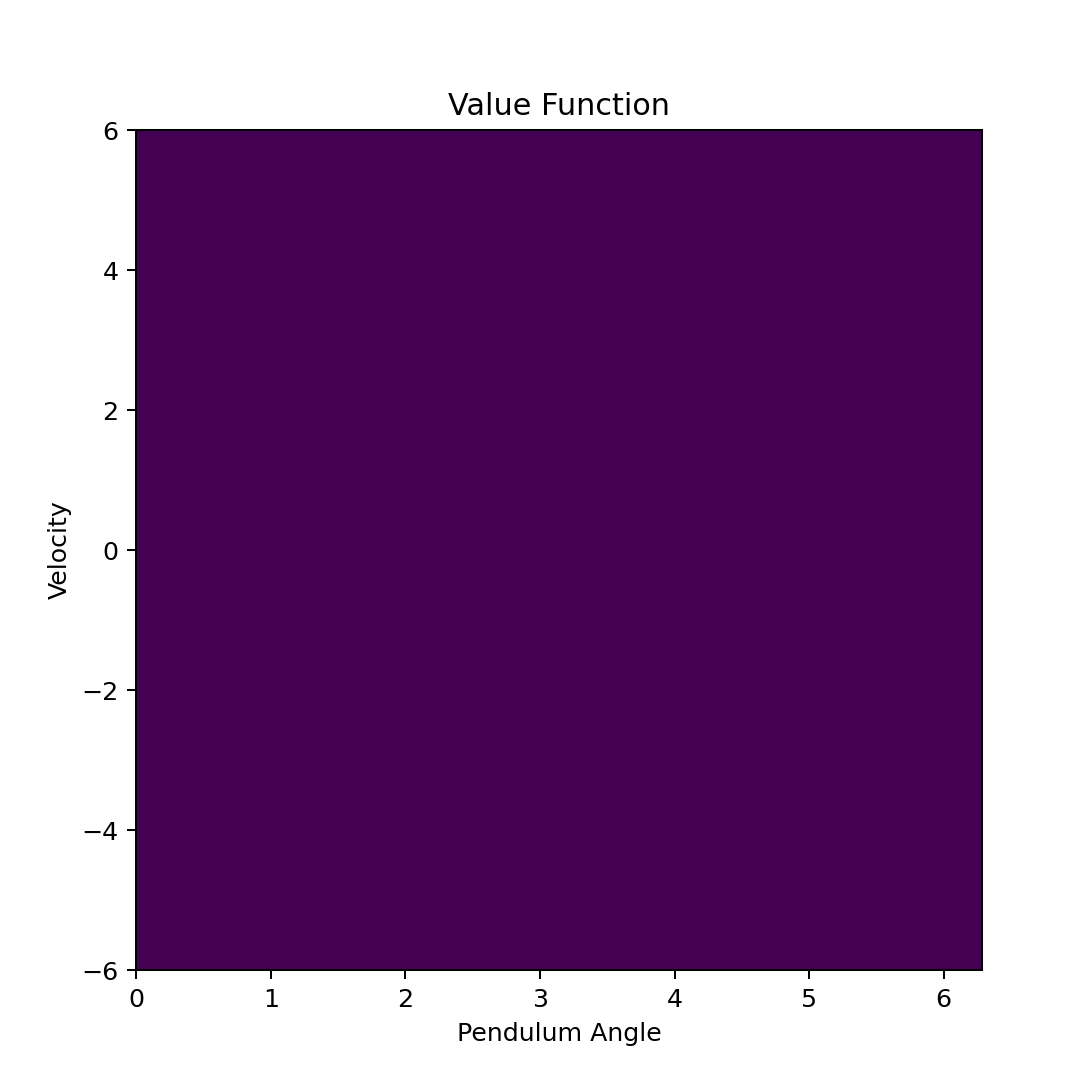

<IPython.core.display.Javascript object>


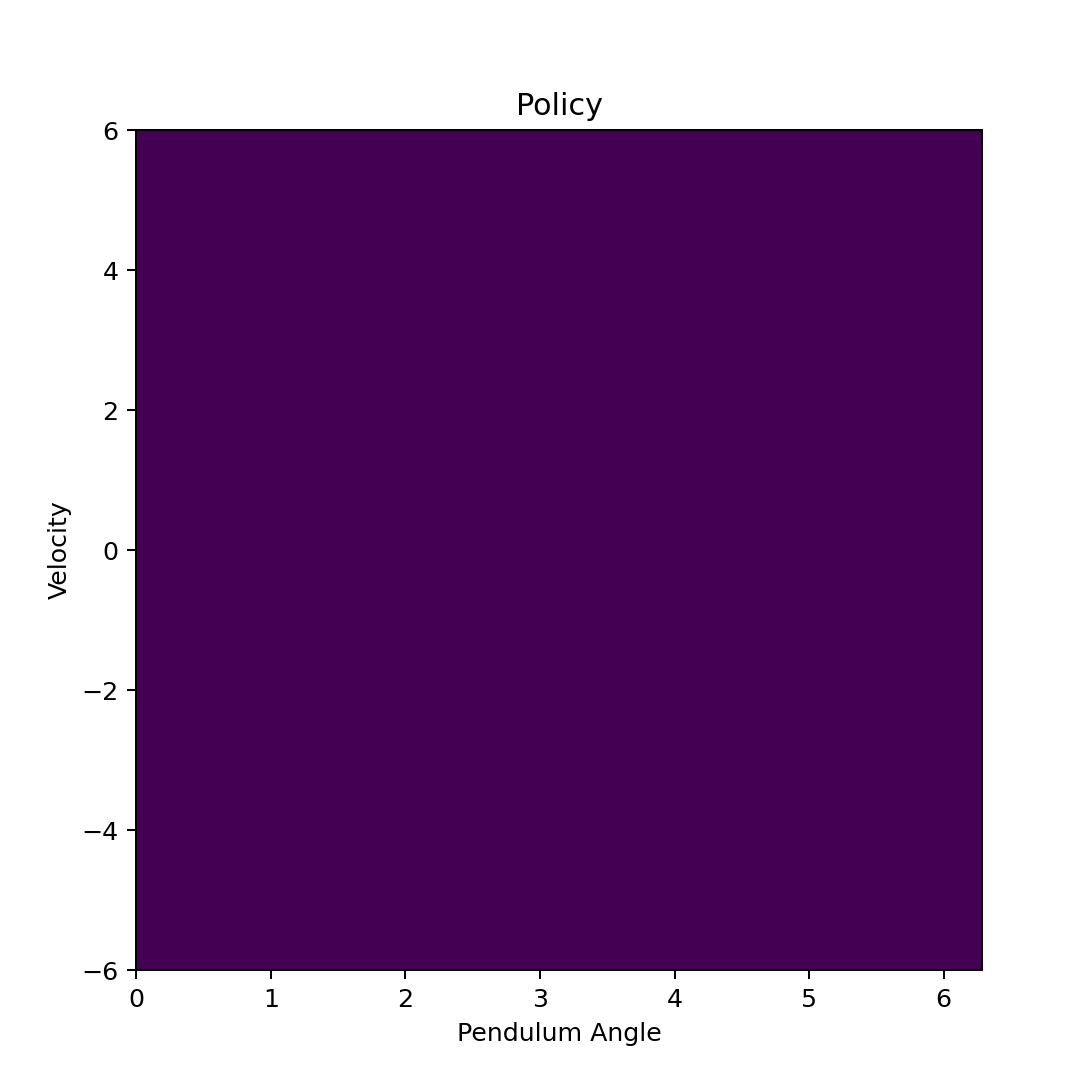

<IPython.core.display.Javascript object>


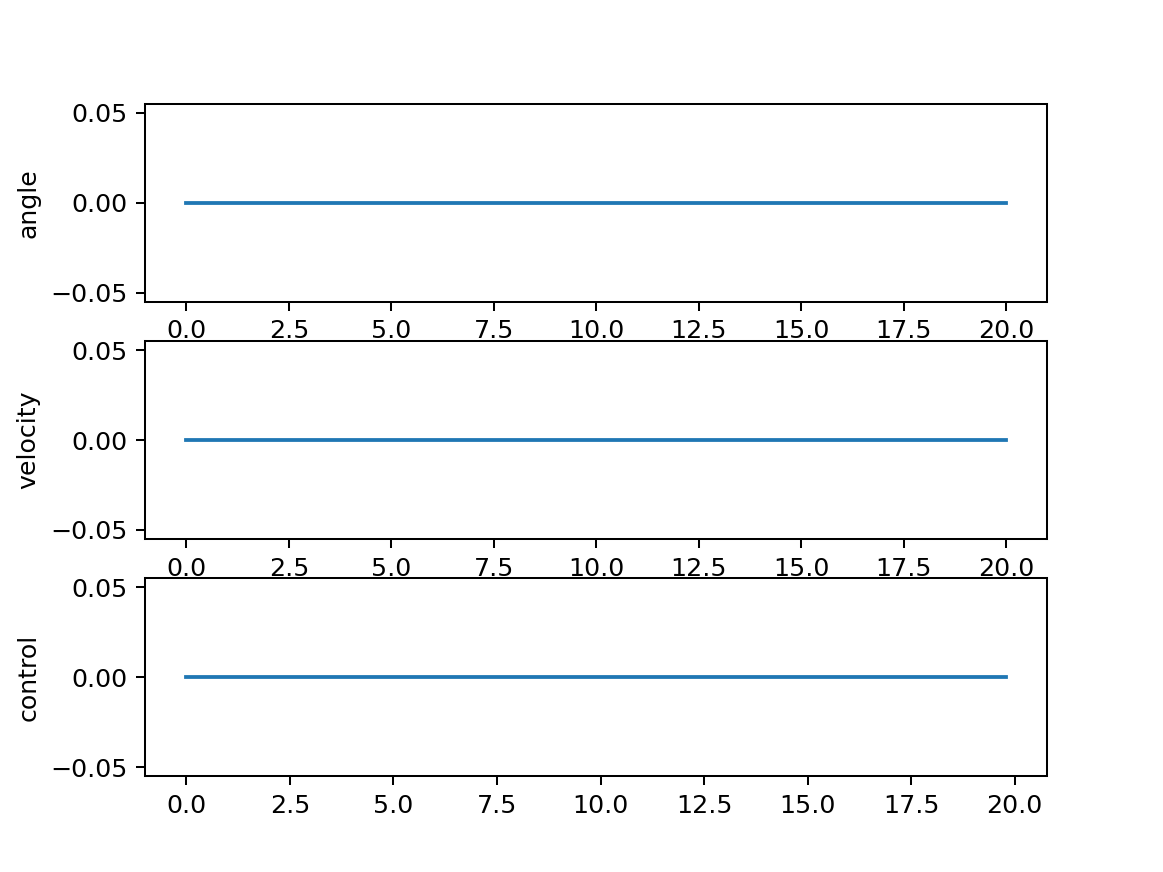

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAGyJtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSByMzAyNyA0MTIxMjc3IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMCAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
DR1liIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwACHHgr8h1jA36boAAANaAG
nDnk/0uKTTxANBMklOx5AfoyzTNjGZoxSMjI2XqpG5muyFpkpA6oCAPVnxylzDLYhuV6SiLysV19
ZrkfNVeuuW3Q9PnAIUDhMZl7zUCMeOI9XyhO34h2N6JqaLaBMEJBECZ+5uHUUpUwEyHMK0SddgK8
GQ+8N9YKy9+mi5xcrkYkRWJQER7+UzLKhVSfJl1dCKS9cKV2QpOCIcN2cB6dc7SsaFnK+lNL704K
VLG608M5FPwh6EL0EBwAfACHU1dX1oJZzgeYkF9jIDc1B3hLlj82wiQfYvK10RzuN9Q1U62r1Osc
ElerAZPXIcx/zTPnGxXw5umCITKeSjxzd7a4br1XC57E49S2VekK2ZcoSsDlXM3IXwr8wKVNTmii
S4/b2C6vQHzLa8snanJg+/rHy8lm80ZnrrjDHhzJMv9fPnzZXf6By7qlajFITt+t8f783P8Mz+Tg
usP5W1SLsMI3NM2xEvgKqVlwK5xY60lN12x7Sxb1UVNJQyHZWr/RBporGZP8yOHAwfJClNMX63fD
m8c59mi2E3q6GhztvWsCyOWh5judEAR3Mtt2SCs6HGEaSgYlXuEYHT/GFbYFW7BXW0mAvXEkEOo0
UO9lDqteHlDvCaab1EPQmssAofZbyBtCTx3gEoMqaxYBPT+PMNxp5Id+nGQWNyIRQ5iQsavyx2XM
b2W+ctDOiAAAAwAAAwAAAwDi8TUQsOltUp9/zuyGXwr0yoBpPkI8Le10cSCSaiKEjR9DlGkxWnnt
zlAQc7spaDgRFnsCpcyIFIxWtTXY7YGA8qUN/W4+qlML9qxyaJB+go3FPoc8omXrA5YtioT4LLf3
t5xpv8DlNSbtLxcGTG0163Wwvm1f4DggHQFu5mnhUH4ni06/M5yIhQCK4hGapzkYyHwpmbI08imp
thgTTwYorp02GCn3MRIzz1p8GsMLVOBAw8jHH8tTvZ7qfvizDqv/gxiS3CZEhjz4bo1ANtQRCYOH
9MhqpclX0vh4Ake58GmHwvpaW/j5W/T6WIZmxNCL5/4Q/zj7RiqEs8yMCmK2E3zzz0MtCD/qerWb
ZfMIDRGW+UyzVu07NHZ9jsGJpX9T28ny+ZYn0dRiOOHVIKIFeWU9gkKP6zVw95aBJJICQ6IN3zPJ
iVXBQAAAAwAAAwABdmLmf4DwmPkj9ThNpZM5EdrdhZaPBTLMtoYnshunUr3b/iEHRbD7+mdeCkBH
DSJkvKT3m+mOd9ep3sywhkUj9wOV6ZQnDlWTRDidJIjqn6dEZ6IQ4r5cfw9ybZbTSJS83st0keVg
VLNqIWhiZj+2P29paFOVzmzi01tc+o+mgrDmqbN7cp+jGY6AYzbhO/KzDlBhmxN8l8LOjZo9VzKg
sTcwBcUdJpCEOcB+a+OjmpwT+xeWzOkrjaIrSRlcn5REEoMZqHyUlx1OJmE/31vTunVFcVHyNule
Iugh2fggxq5mma+AF84wQRhTy1nhzsoJTX8XZGc0z5816aJ91V1O7tRupt5/4ETEe3lMWWkMPHdf
VKJmY1EZHh/y3LSzOPpLp4t/8EAcIpt88AuNFrpmdhf1+48MBlOKp277u+NIfROAMtU70vf40gJ9
ZQuQpkUgS44x/X0mQsw/biA0pXQrwU9eZNfVSTKiX/HQQJ0dGhdeLGlq1K03kqS8pe5dF2X/1N5v
xBI7jEEq863lCQ0ubGfGEf6Y14D2AjQ1wVgTSIBq3/046plAk/J0WOxYVMuPNlJrSuJKXk84hu5i
ZyN+t2HpxD/E2MzbBJdzDRRm7MYePkXjeP/i5nFPvl49Ch8gV9/iPhPA0QMM56NNfNwiNqv7kYyy
PEB/ZFo8DcWGPtLZ2ljWwnzH7HH1aqHvYuYThAVZXalgqUhwK+zrgduU8hj7EhoPYa1/z+W+lY37
lz2XTT0bnn6X+O4z+xZsl+P1VY85tKy7ww157rpIVDKTUNexOPrK/4xiXPUtBZwVsaJdv32G8Ama
H7MeVebfYMbM3Wb7rpF3AtM2yjpkeiLmiUKZJ3p62EP8+qUb705drdcuCa+5MirGTzNAJYurhHlL
7AUn04gma2+PVs9HwC/jnPOtHhuM9Sv2Qre7IQb2V1yIui2uFCm9XZ+v3s5Fj1aCLvWS6qVtjdxj
BIStCHvGGf+1wpVPR3sx16o9S+d/duSmMyILpNTHXVlo6TOvDRjDbigpIDtARuUAVmu1GvMxOzmc
VNSqrQ4CzKjq71nkC82IQhynmww5niN/ssPMhr6WKqVeCcdEG2Gd2L9Z7lOPUkdCgqkxF12axYNi
P71HhvfSKyRpKn0zRc0UKvJhPN9g2yyXAAADAPUAAAMABF5asfTGZ5SBX2cLRngvpUoeWFL22qwD
Tu5kRQDFpAjVuRIMJywnrlKfPR9rnxmJ1do7ILOd4q3VjusTB94unCv20cPKta+28Xr3N3O2W6pZ
TCBB8qbf+0NZQ81UuBz2ykEKrKgKCYOjbYJTVIAVTjoXxCUx+FLDhiJoum5/SdXSeVohiMVnOb9O
G58aruQUQr/rJidg9d1yCirihGKX6JoJ6yyjRdnJ4QHCfQvXKXk79KbUV0doxOxB+ndp5oNXdZDB
M1Z+KTp3K5BaNMeVCkj+W9YdX+ofxiN1qKM0OcbB6o4QpiJpG+eCzKXUE85hzxIhRpv1dMAULMeH
QVTJfTtjxuAn89P/bC/+cQm+b2/tBd9Y/I1MB6dwwlEl7tvkM/+KFcFUo+qTdht4E1OQzGs5br/6
LNLCyP7HZFZ9GJDkpa6zH3IIwmNo/LJaDEQoa7T4JjSJaylDT3dB/RxdTFUtQ/AxMlTNTt/sOnLl
7OQb/XdmZvlHPt0l/zoDj

In [4]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2


# we make a robot
robot = pendulum.Pendulum()

value_function = np.zeros([50,50])
policy = np.zeros([50,50])

# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')

# now we simulate the dynamics for 100 time steps
x0 = np.array([0.,0.])

def controller(x):
    theta = np.linspace(0, 2*np.pi, 50, endpoint=False)
    dtheta = np.linspace(-6, 6, 50)
    
    th_index = np.argmin(np.abs(theta - x[0]))
    dth_index = np.argmin(np.abs(dtheta - x[1]))
    return policy[th_index, dth_index]

x, u = robot.simulate(x0, controller, 10)

# and plot the results
time = np.linspace(0.,20., len(x[0,:]))
plt.figure()
plt.subplot(3,1,1)
plt.plot(time,x[0,:])
plt.ylabel('angle')
plt.subplot(3,1,2)
plt.plot(time,x[1,:])
plt.ylabel('velocity')
plt.subplot(3,1,3)
plt.plot(time[:-1],u)
plt.ylabel('control')

# and show an animation
robot.animate_robot(x, robot.delta_t)